In [1]:
import sys
import numpy as np
import datetime
%pylab inline
from os import listdir, path, chdir
from matplotlib.pylab import savefig

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12.0, 6.0)

In [3]:
data_folder = "/home/photon/data/06-15-2015" #the data folder for double slit data
sys.path.append("/home/photon/code/Qfunction/")
chdir(data_folder)
import Qfunction as Q

In [4]:
allFiles = listdir(data_folder)
allFiles.sort()
allFiles

['10-42-54_raw.npz',
 '10-43-49_raw.npz',
 '14-50-22_raw.npz',
 '14-51-17_raw.npz',
 '15-05-31_raw.npz',
 '15-06-26_raw.npz',
 '15-10-41_raw.npz',
 '15-11-35_raw.npz',
 '15-21-28_raw.npz',
 '15-22-22_raw.npz',
 'FFT-06-15-2015-dataset1.png',
 'averagePhotonsErrorBars-06-15-2015-dataset1.pdf',
 'averagePhotonsErrorBars-06-15-2015-dataset1.png']

In [5]:
vacuum_npz = np.load(allFiles[0]) #vacuum of the choice pair
data_npz = np.load(allFiles[1])   #data of the choice pair
data = data_npz['dataOut']
vacuum = vacuum_npz['dataOut']
ncount = data_npz['ncount']

In [6]:
n = np.sqrt(ncount)
print("Std dev. of LO: ", n.std()/n.mean())
print("Peak to Peak as fraction of LO mean: ", (n.max()-n.min())  / n.mean())

Std dev. of LO:  0.00263544155952
Peak to Peak as fraction of LO mean:  0.0171822063418


In [7]:
Kp_vac = np.average(vacuum,axis=(1,2))

In [8]:
scaled_vc = np.sqrt(2.0/ncount)*(data - Kp_vac.reshape(600,1,1))

In [9]:
avg_n_quick = [0.5*(np.mean(np.abs(scaled_vc[i,:,:].flatten('F'))))**2 for i in range(300)]

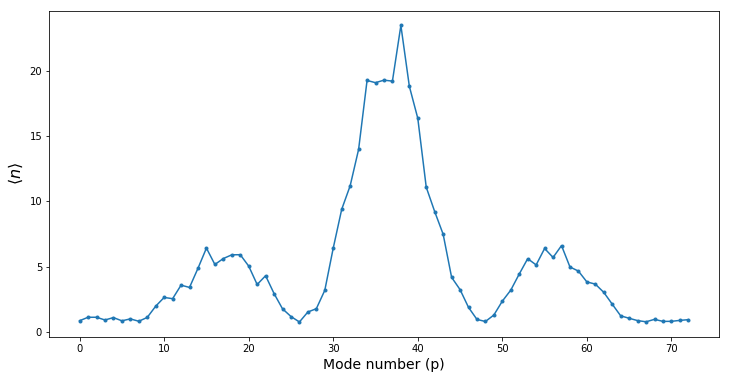

In [10]:
plot(avg_n_quick[167:240],".-")  # look at the modes with their amplitudes
xlabel("Mode number (p)",size=14)
ylabel("$\\langle n \\rangle$",size=16)

/home/photon/code/Qfunction/Qfunction.py:171: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(nsquared - avgn**2)


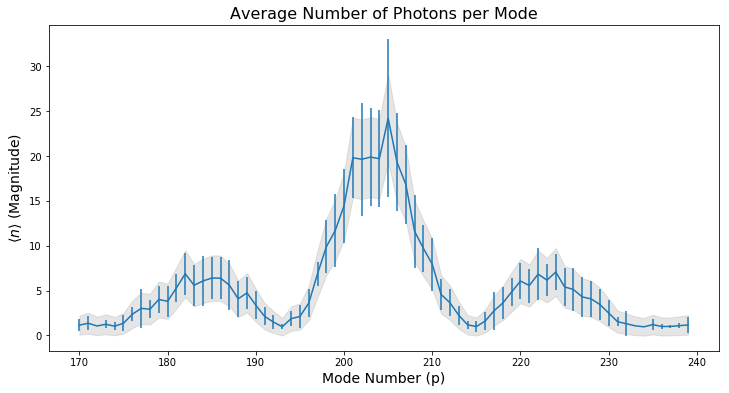

In [11]:
fig = figure()
ax = gca()
std_dev_n = np.zeros(300)
avg_n = np.zeros(300)
for i in range(170,240):
    x = np.real(scaled_vc[i,:,:].flatten('F'))
    y = np.imag(scaled_vc[i,:,:].flatten('F'))
    std_dev_n[i] = Q.std_n_raw(x,y)
    avg_n[i] = Q.avg_n_raw(x,y)


errorbar(arange(170,240,1),avg_n[170:240],yerr=std_dev_n[170:240])
theory_std = np.sqrt(avg_n[170:240])
title("Average Number of Photons per Mode", size = 16)
xlabel("Mode Number (p)",size=14)
ylabel("$\\langle n \\rangle$ (Magnitude)",size=14)
fill_between(arange(170,240,1),avg_n[170:240] + theory_std,avg_n[170:240] - theory_std,alpha=0.2,color="grey")
savefig("averagePhotonsErrorBars-06-15-2015-dataset1.pdf")


In [12]:
np.sqrt(avg_n[170:240])

array([ 1.07167332,  1.16705438,  1.02793756,  1.11636586,  1.01616869,
        1.16612297,  1.53761527,  1.73671358,  1.7115532 ,  2.00217914,
        1.95094354,  2.30372714,  2.62271849,  2.36478489,  2.46398153,
        2.52886975,  2.5269896 ,  2.36789023,  2.02128723,  2.17845891,
        1.83446367,  1.45863086,  1.22102337,  0.98469924,  1.36783165,
        1.45612277,  1.9012554 ,  2.62426328,  3.14608473,  3.4190084 ,
        3.80301851,  4.45024771,  4.43109688,  4.45797811,  4.43817099,
        4.9194734 ,  4.395149  ,  4.10361603,  3.40611504,  3.11295293,
        2.81816584,  2.13794412,  1.91115671,  1.50123106,  1.08906545,
        0.99750009,  1.26694751,  1.65821396,  1.90239118,  2.20289769,
        2.46321524,  2.35904544,  2.61525912,  2.48359029,  2.65792395,
        2.32623311,  2.26304326,  2.07246578,  2.01965807,  1.85659929,
        1.58099571,  1.23905294,  1.14329302,  1.03648097,  0.98200467,
        1.09965129,  0.99984556,  1.00349492,  1.04407425,  1.08

In [13]:
mode = 205
check_n = 0.5*(np.abs(scaled_vc[mode,:,:].mean(axis=0)))**2  # look at the abs of one mode averaged over all shots per round:
check_var = np.abs(scaled_vc[mode,:,:]).std(axis=0)

Check the average photon number for each of the rounds. Hopefully the output is stable over these longer time scales.

(0, 1.2699359531615817)

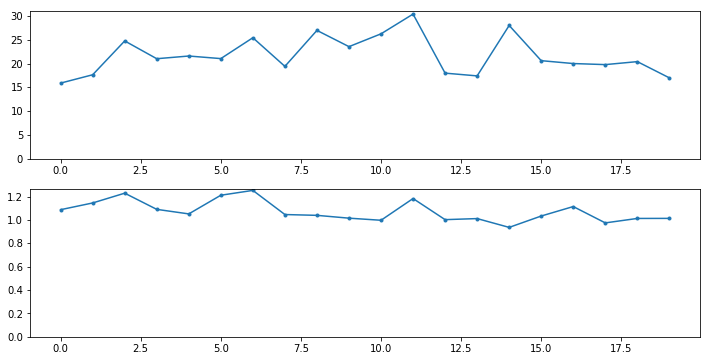

In [14]:
subplot(211)
plot(check_n,".-")
ylim(ymin=0)
subplot(212)
plot(check_var,".-")
ylim(ymin=0)

Now pick the best section of the rounds: 10:40 (not sure if this matters much, but worth checking)

In [15]:
output = scaled_vc[mode,:,0:20].flatten('F')

In [16]:
x = np.real(output)
y = np.imag(output)

In [17]:
0.5*(np.abs(output).mean())**2  # the easy calculation

23.49888559684274

In [18]:
n = Q.avg_n_raw(x,y)  # the estimated photon number from x and y
n

24.201218559488748

In [19]:
X,Y,Z = Q.kernel_estimate(x,y)

KDE kernel factor:  0.316227766017


In [20]:
print("<n_Q> = ",Q.avg_n(X,Y,Z)) # the calculated from Q function
print("<n_Q-raw> = ", Q.avg_n_raw(x,y))
print("StDev n = ", Q.std_n(X,Y,Z))
print("StDev n raw = ", Q.std_n_raw(x,y))

<n_Q> =  501.299334205
<n_Q-raw> =  24.2012185595
StDev n =  nan
StDev n raw =  8.78247500862


/home/photon/code/Qfunction/Qfunction.py:157: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(nsquared - avgn**2)


In [21]:
print("Kernel estimate noise as percent: %0.2f" % ((Q.std_n(X,Y,Z) / sqrt(Q.avg_n(X,Y,Z)) - 1)*100))
print("Raw quadratures noise as percent: %0.2f" % ((Q.std_n_raw(x,y) / sqrt(Q.avg_n_raw(x,y)) - 1)*100))

Kernel estimate noise as percent: nan
Raw quadratures noise as percent: 78.52


/home/photon/code/Qfunction/Qfunction.py:157: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(nsquared - avgn**2)


KDE kernel factor:  0.316227766017


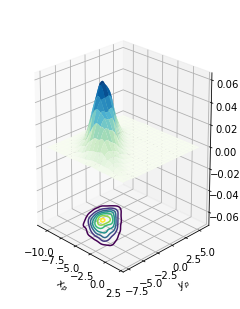

In [27]:
Q.qsurf(x,y)  # good looking figures though!
plt.savefig("wigner.pdf")

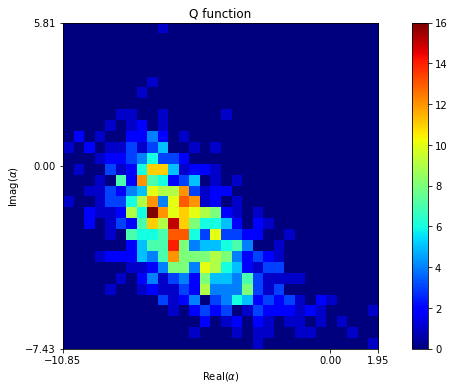

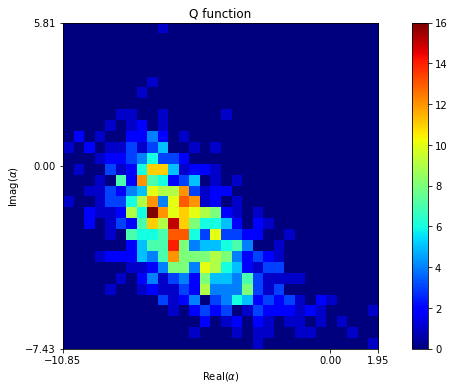

In [23]:
Q.qfuncimage(output)

In [24]:
vacFFT = np.average(vacuum,axis=(1,2))

In [25]:
VacCorrected = data[:,:,:] - vacFFT.reshape(600,1,1)

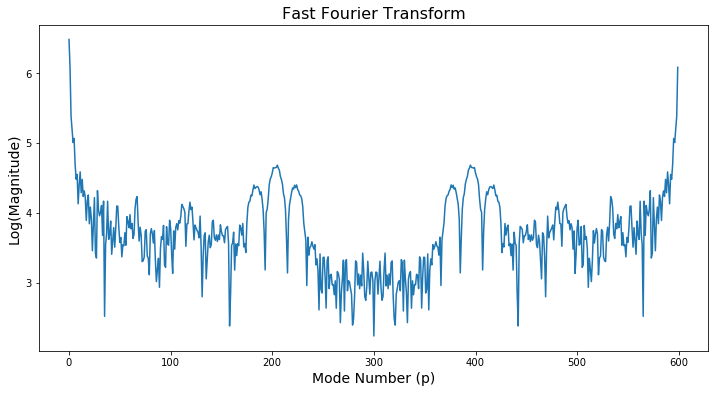

In [26]:
plt.plot( np.log10(abs((np.average(VacCorrected,axis=(1,2)))) ))
savefig("FFT-06-15-2015-dataset1")
title("Fast Fourier Transform", size = 16)
xlabel("Mode Number (p)",size=14)
ylabel("Log(Magnitude)",size=14)
savefig("FFT-06-15-2015-dataset1")